In [1]:
###
# This code answer a question:
# Making a relationship between the number of contacts and campaign success
# what are the relevant points to be observed?
# By Sidon 2018
###

Null Hypothesis:<br>
There is no relationship between the number of contacts and campaign success.<br>
H0 = There is no relationship between the two categorical variables - they are indepent.

Alternative Hypothesis:<br>
There is relationship between the number of contacts and campaign success.<br>
H1 = There is a relationship between the two categorical variables - they are not idependent.

H0 = proportion of number of contacts = proportion of success<br>
h1 = proportion of number of contacts != proportion of success

chi-square test of independence:<br>
The idea behind the chi-square test of independence, much like the analysis of variance is to measure how far the data are from what is claimed in the null hypothesis. The further the data are from the null hypothesis, the more evidence the data presents against it. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from tabulate import tabulate, tabulate_formats
from utils import Dataset
from collections import OrderedDict
%matplotlib inline 

In [3]:
ds =  Dataset()
data = ds.get_data(['campaign','previous','y'])

In [4]:
# Inserir coluna para totalizar os contatos realizados
tt_contacts = data.campaign+data['previous'] 
data.insert(loc=2, column='tt_contacts', value=tt_contacts)

In [5]:
# Copy for conveniency
data1 = data.copy()

In [6]:
# Remove outliers
q = data1['tt_contacts'].quantile(0.99)
data1 = data1[data1['tt_contacts']<q]

In [7]:
data1

,campaign,previous,tt_contacts,y
0,1,0,1,no
1,1,0,1,no
2,1,0,1,no
3,1,0,1,no
4,1,0,1,no
...,...,...,...,...
45206,3,0,3,yes
45207,2,0,2,yes
45208,5,3,8,yes
45209,4,0,4,no


In [8]:
# contingency table of observed counts
ct_total = pd.crosstab(data1.y, data1.tt_contacts)

``` 
lambda_ : float or str, optional

lambda_ gives the power in the Cressie-Read power divergence statistic. The default is 1. For convenience, lambda_ may be assigned one of the following strings, in which case the corresponding numerical value is used:

String              Value   Description
"pearson"             1     Pearson's chi-squared statistic.
                            In this case, the function is
                            equivalent to `stats.chisquare`.
"log-likelihood"      0     Log-likelihood ratio. Also known as
                            the G-test [R256]_.
"freeman-tukey"      -1/2   Freeman-Tukey statistic.
"mod-log-likelihood" -1     Modified log-likelihood ratio.
"neyman"             -2     Neyman's statistic.
"cressie-read"        2/3   The power recommended in [R258]_.
```

In [9]:
# G-test for totals
chi2g = {}
cs1 = stats.chi2_contingency(ct_total, lambda_="log-likelihood")
chi2g['chi-square'] = [cs1[0]]
chi2g['p-value'] = [cs1[1]]
chi2g['dof'] = [cs1[2]]
# chi2g['expected'] = [cs1[3]]

In [10]:
print ('Log-likelihood ratio. Also known as the G-test. for totals contacts x success')
print (tabulate(chi2g, tablefmt='fancy_grid', headers='keys', numalign="center"))

Log-likelihood ratio. Also known as the G-test. for totals contacts x success
╒══════════════╤═════════════╤═══════╕
│  chi-square  │   p-value   │  dof  │
╞══════════════╪═════════════╪═══════╡
│   60.1768    │ 4.88676e-07 │  16   │
╘══════════════╧═════════════╧═══════╛


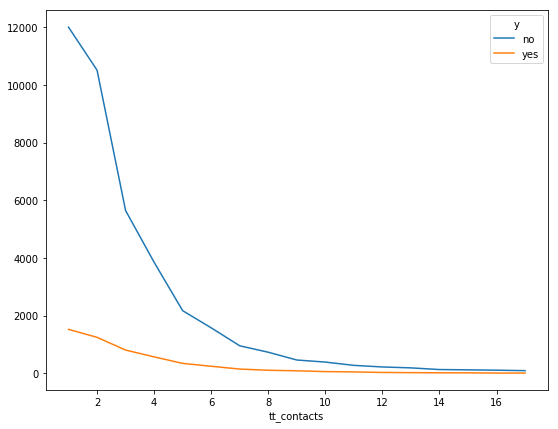

In [11]:
ct_total.T.plot(figsize=(9, 7))

In [12]:
# column percentages
colsum=ct_total.sum(axis=0)
colsum.astype(int)
colpct=ct_total/colsum

colpct_t = colpct.T.sort_values(by=['yes'], ascending=False)
colpct_t.insert(loc=0, column='Freq.', value=colsum)

In [13]:
print('Totals contacts frequency (campaing + previous)')
print(tabulate(colpct_t, tablefmt='fancy_grid', headers='keys', numalign="decimal"))

Totals contacts frequency (campaing + previous)
╒═══════════════╤═════════╤══════════╤═══════════╕
│   tt_contacts │   Freq. │       no │       yes │
╞═══════════════╪═════════╪══════════╪═══════════╡
│             9 │     546 │ 0.842491 │ 0.157509  │
├───────────────┼─────────┼──────────┼───────────┤
│            11 │     321 │ 0.853583 │ 0.146417  │
├───────────────┼─────────┼──────────┼───────────┤
│             5 │    2514 │ 0.863564 │ 0.136436  │
├───────────────┼─────────┼──────────┼───────────┤
│             6 │    1819 │ 0.86641  │ 0.13359   │
├───────────────┼─────────┼──────────┼───────────┤
│             7 │    1099 │ 0.867152 │ 0.132848  │
├───────────────┼─────────┼──────────┼───────────┤
│            10 │     446 │ 0.869955 │ 0.130045  │
├───────────────┼─────────┼──────────┼───────────┤
│             4 │    4419 │ 0.871238 │ 0.128762  │
├───────────────┼─────────┼──────────┼───────────┤
│             3 │    6449 │ 0.875174 │ 0.124826  │
├───────────────┼─────────┼───────

In [14]:
# Freeman-Turkey test for totals
chi2ft = {}
cs2 = stats.chi2_contingency(ct_total, lambda_="freeman-tukey")
chi2ft['chi-square'] = [cs2[0]]
chi2ft['p-value'] = [cs2[1]]
chi2ft['dof'] = [cs2[2]]
# chi2ft['expected'] = [cs2[3]]

In [15]:
print('Freeman-Tukey statistic. for totals contacts x success')
print(tabulate(chi2ft, tablefmt='fancy_grid', headers='keys', numalign="center"))

Freeman-Tukey statistic. for totals contacts x success
╒══════════════╤═════════════╤═══════╕
│  chi-square  │   p-value   │  dof  │
╞══════════════╪═════════════╪═══════╡
│    60.278    │ 4.69836e-07 │  16   │
╘══════════════╧═════════════╧═══════╛


In [22]:
ct = pd.DataFrame(data1.groupby(by=['tt_contacts','campaign','previous', 'y']).size())
def totaldf():
    d1 = OrderedDict()
    for c in ct.iterrows():
        tt = c[0][0]
        response = c[0][3]
        if tt in d1:
            if response in d1[tt]:
                d1[tt][response]+=c[1][0]
            else:
                d1[tt][response]=c[1][0]
            d1[tt]['campaign']+=c[0][1]    
            d1[tt]['previous']+=c[0][2]    
        else:
            d1[tt]={'tt': c[0][0], 'campaign': c[0][1], 'previous': c[0][2], response: c[1][0]}
        lst = [d1[d] for d in d1]
        df = pd.DataFrame(lst, columns=['tt', 'campaign', 'previous', 'no', 'yes'])
    df['previous%'] = df.previous/df.campaign
    df['success'] = df.yes/(df.yes+df.no)
    return df

df = totaldf().sort_values(by=['success'], ascending=False)    


print(tabulate(df, tablefmt='fancy_grid', headers='keys', numalign="decimal"))


╒════╤══════╤════════════╤════════════╤═══════╤═══════╤═════════════╤═══════════╕
│    │   tt │   campaign │   previous │    no │   yes │   previous% │   success │
╞════╪══════╪════════════╪════════════╪═══════╪═══════╪═════════════╪═══════════╡
│  8 │    9 │         90 │         72 │   460 │    86 │    0.8      │ 0.157509  │
├────┼──────┼────────────┼────────────┼───────┼───────┼─────────────┼───────────┤
│ 10 │   11 │        105 │        104 │   274 │    47 │    0.990476 │ 0.146417  │
├────┼──────┼────────────┼────────────┼───────┼───────┼─────────────┼───────────┤
│  4 │    5 │         30 │         20 │  2171 │   343 │    0.666667 │ 0.136436  │
├────┼──────┼────────────┼────────────┼───────┼───────┼─────────────┼───────────┤
│  5 │    6 │         42 │         30 │  1576 │   243 │    0.714286 │ 0.13359   │
├────┼──────┼────────────┼────────────┼───────┼───────┼─────────────┼───────────┤
│  6 │    7 │         56 │         42 │   953 │   146 │    0.75     │ 0.132848  │
├────┼──────┼───

In [50]:
dfp = pd.crosstab(data1.y, [data1.previous]).T
dfp['success']=dfp.yes/(dfp.no+dfp.yes) 
dfp = dfp.sort_values(by=['success'], ascending=False)
dfp

y,no,yes,success
previous,,,
10,40,26,0.393939
13,18,9,0.333333
14,9,4,0.307692
8,90,39,0.302326
6,193,83,0.300725
...,...,...,...
1,2189,583,0.210317
12,31,8,0.205128
15,7,1,0.125000


In [51]:
dfc = pd.crosstab(data1.y, [data1.campaign]).T
dfc['success']=dfc.yes/(dfc.no+dfc.yes) 
dfc = dfc.sort_values(by=['success'], ascending=False)
dfc

y,no,yes,success
campaign,,,
1,14962,2559,0.146053
2,11077,1395,0.111851
3,4886,614,0.111636
4,3195,314,0.089484
17,63,6,0.086957
...,...,...,...
15,79,4,0.048193
13,126,6,0.045455
14,89,4,0.043011


In [52]:
dft = pd.crosstab(data1.y, [data1.tt_contacts]).T
dft['success']=dft.yes/(dft.no+dft.yes) 
dft = dft.sort_values(by=['success'], ascending=False)
dft

y,no,yes,success
tt_contacts,,,
9,460,86,0.157509
11,274,47,0.146417
5,2171,343,0.136436
6,1576,243,0.133590
7,953,146,0.132848
...,...,...,...
14,129,16,0.110345
2,10513,1247,0.106037
13,187,22,0.105263


In [57]:
champions = data1[data1.tt_contacts==9]
ctchampions = pd.crosstab(champions.y, [champions.tt_contacts,champions.previous]).T
ctchampions['perc'] = ctchampions.yes/(ctchampions.yes+ctchampions.no)
ctchampions = ctchampions.sort_values(by=['perc'], ascending=False)
ctchampions


y                      no  yes      perc
tt_contacts previous                    
9           6          24   16  0.400000
            8          34   19  0.358491
            7          37   15  0.288462
            4          17    6  0.260870
            5          24    5  0.172414
            2          12    2  0.142857
            3          18    3  0.142857
            1          10    1  0.090909
            0         284   19  0.062706

### Conclusion
- The Pearson's chi-squared statistic test was avoided by  there were frequencies under 5, then I was used 2 tests:  Log-likelihood ratio (G-test) and Freeman-Tukey statistic, in both results, is possible to notice that we can reject the null hypothesis, i.e. there is a correlation between the number of contacts and the success of campaign.

- 